In [163]:
!pip install xgboost

In [164]:
!pip install wordcloud

In [165]:
!pip install plotly

In [166]:
!pip install jupyterthemes

In [167]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization
from jupyterthemes import jtplot # Jupyter Notebook Theme
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.


In [168]:
# Read the CSV file 
car_df=pd.read_csv("cars_data.csv")

In [169]:
# Load the top 10 instances
car_df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


In [170]:
# Load the bottom 10 instances 
car_df.tail(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
418,Volvo,S60 2.5 4dr,Sedan,Europe,All,"$31,745","$29,916",2.5,5.0,208,20,27,3903,107,180
419,Volvo,S60 T5 4dr,Sedan,Europe,Front,"$34,845","$32,902",2.3,5.0,247,20,28,3766,107,180
420,Volvo,S60 R 4dr,Sedan,Europe,All,"$37,560","$35,382",2.5,5.0,300,18,25,3571,107,181
421,Volvo,S80 2.9 4dr,Sedan,Europe,Front,"$37,730","$35,542",2.9,6.0,208,20,28,3576,110,190
422,Volvo,S80 2.5T 4dr,Sedan,Europe,All,"$37,885","$35,688",2.5,5.0,194,20,27,3691,110,190
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


In [171]:
# Display the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [172]:
# Check the shape of the dataframe
car_df.shape

(428, 15)

In [173]:
# Check if any missing values are present in the dataframe
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [174]:
car_df=car_df.dropna()
car_df['Cylinders'].isnull().sum()

0

In [175]:
# Obtain the summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [176]:
# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns

car_df["MSRP"] = car_df["MSRP"].str.replace("$", "")
car_df["MSRP"] = car_df["MSRP"].str.replace(",", "")
car_df["MSRP"] = car_df["MSRP"].astype(int)

/var/folders/lh/w6ds713n5v39n0thp4d8nw9h0000gn/T/ipykernel_4889/3481706957.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [177]:
car_df["MSRP"]

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 426, dtype: int64

In [178]:
car_df["Invoice"] = car_df["Invoice"].str.replace("$", "")
car_df["Invoice"] = car_df["Invoice"].str.replace(",", "")
car_df["Invoice"] = car_df["Invoice"].astype(int)

/var/folders/lh/w6ds713n5v39n0thp4d8nw9h0000gn/T/ipykernel_4889/2349357684.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [179]:
# Let's view the updated MSRP and Invoice Columns
car_df["Invoice"]

0      33337
1      21761
2      24647
3      30299
4      39014
       ...  
423    38203
424    40083
425    42573
426    24641
427    33112
Name: Invoice, Length: 426, dtype: int64

In [180]:
# Display the updated summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    int64  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 53.2+ KB


In [181]:
car_df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,32804.549296,30040.654930,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188
std,19472.460825,17679.430122,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611
min,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20324.750000,18836.000000,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000
50%,27807.500000,25521.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,39225.000000,35754.750000,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [182]:
car_df['MSRP'].min()

10280

In [183]:
car_df['MSRP'].max()

192465

In [184]:
# scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(data=car_df)

In [185]:
# Let's view various makes of the cars
car_df['Make'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [186]:
fig = px.histogram(car_df, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["maroon"])
                  
fig.show()

In [187]:
# Let's view various types of the cars
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [188]:
fig = px.histogram(car_df, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["blue"])
                  
fig.show()

In [189]:
# Let's plot the location
car_df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [190]:
fig = px.histogram(car_df, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["brown"])
                  
fig.show()

In [191]:
# Let's view the drivetrain of the cars
car_df.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [192]:
fig = px.histogram(car_df, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["BLACK"])
                  
fig.show()

In [193]:
# Plot the make of the car and its location
fig = px.histogram(car_df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

In [194]:

fig = px.histogram(car_df, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs Type")
                  
fig.show()

In [195]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

In [196]:
car_df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170,22,29,2822,101,180


In [197]:
text = car_df.Model.values

In [198]:
text

array(['MDX', 'RSX Type S 2dr', 'TSX 4dr', 'TL 4dr', '3.5 RL 4dr',
       '3.5 RL w/Navigation 4dr', 'NSX coupe 2dr manual S', 'A4 1.8T 4dr',
       'A41.8T convertible 2dr', 'A4 3.0 4dr',
       'A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto',
       'A6 3.0 4dr', 'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr',
       'A4 3.0 Quattro convertible 2dr', 'A6 2.7 Turbo Quattro 4dr',
       'A6 4.2 Quattro 4dr', 'A8 L Quattro 4dr', 'S4 Quattro 4dr',
       'RS 6 4dr', 'TT 1.8 convertible 2dr (coupe)',
       'TT 1.8 Quattro 2dr (convertible)',
       'TT 3.2 coupe 2dr (convertible)', 'A6 3.0 Avant Quattro',
       'S4 Avant Quattro', 'X3 3.0i', 'X5 4.4i', '325i 4dr', '325Ci 2dr',
       '325Ci convertible 2dr', '325xi 4dr', '330i 4dr', '330Ci 2dr',
       '330xi 4dr', '525i 4dr', '330Ci convertible 2dr', '530i 4dr',
       '545iA 4dr', '745i 4dr', '745Li 4dr', 'M3 coupe 2dr',
       'M3 convertible 2dr', 'Z4 convertible 2.5i 2dr',
       'Z4 convertible 3.0i 2dr', '325xi Sport', 'Ra

In [199]:
stopwords = set(STOPWORDS)

In [200]:
wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))          

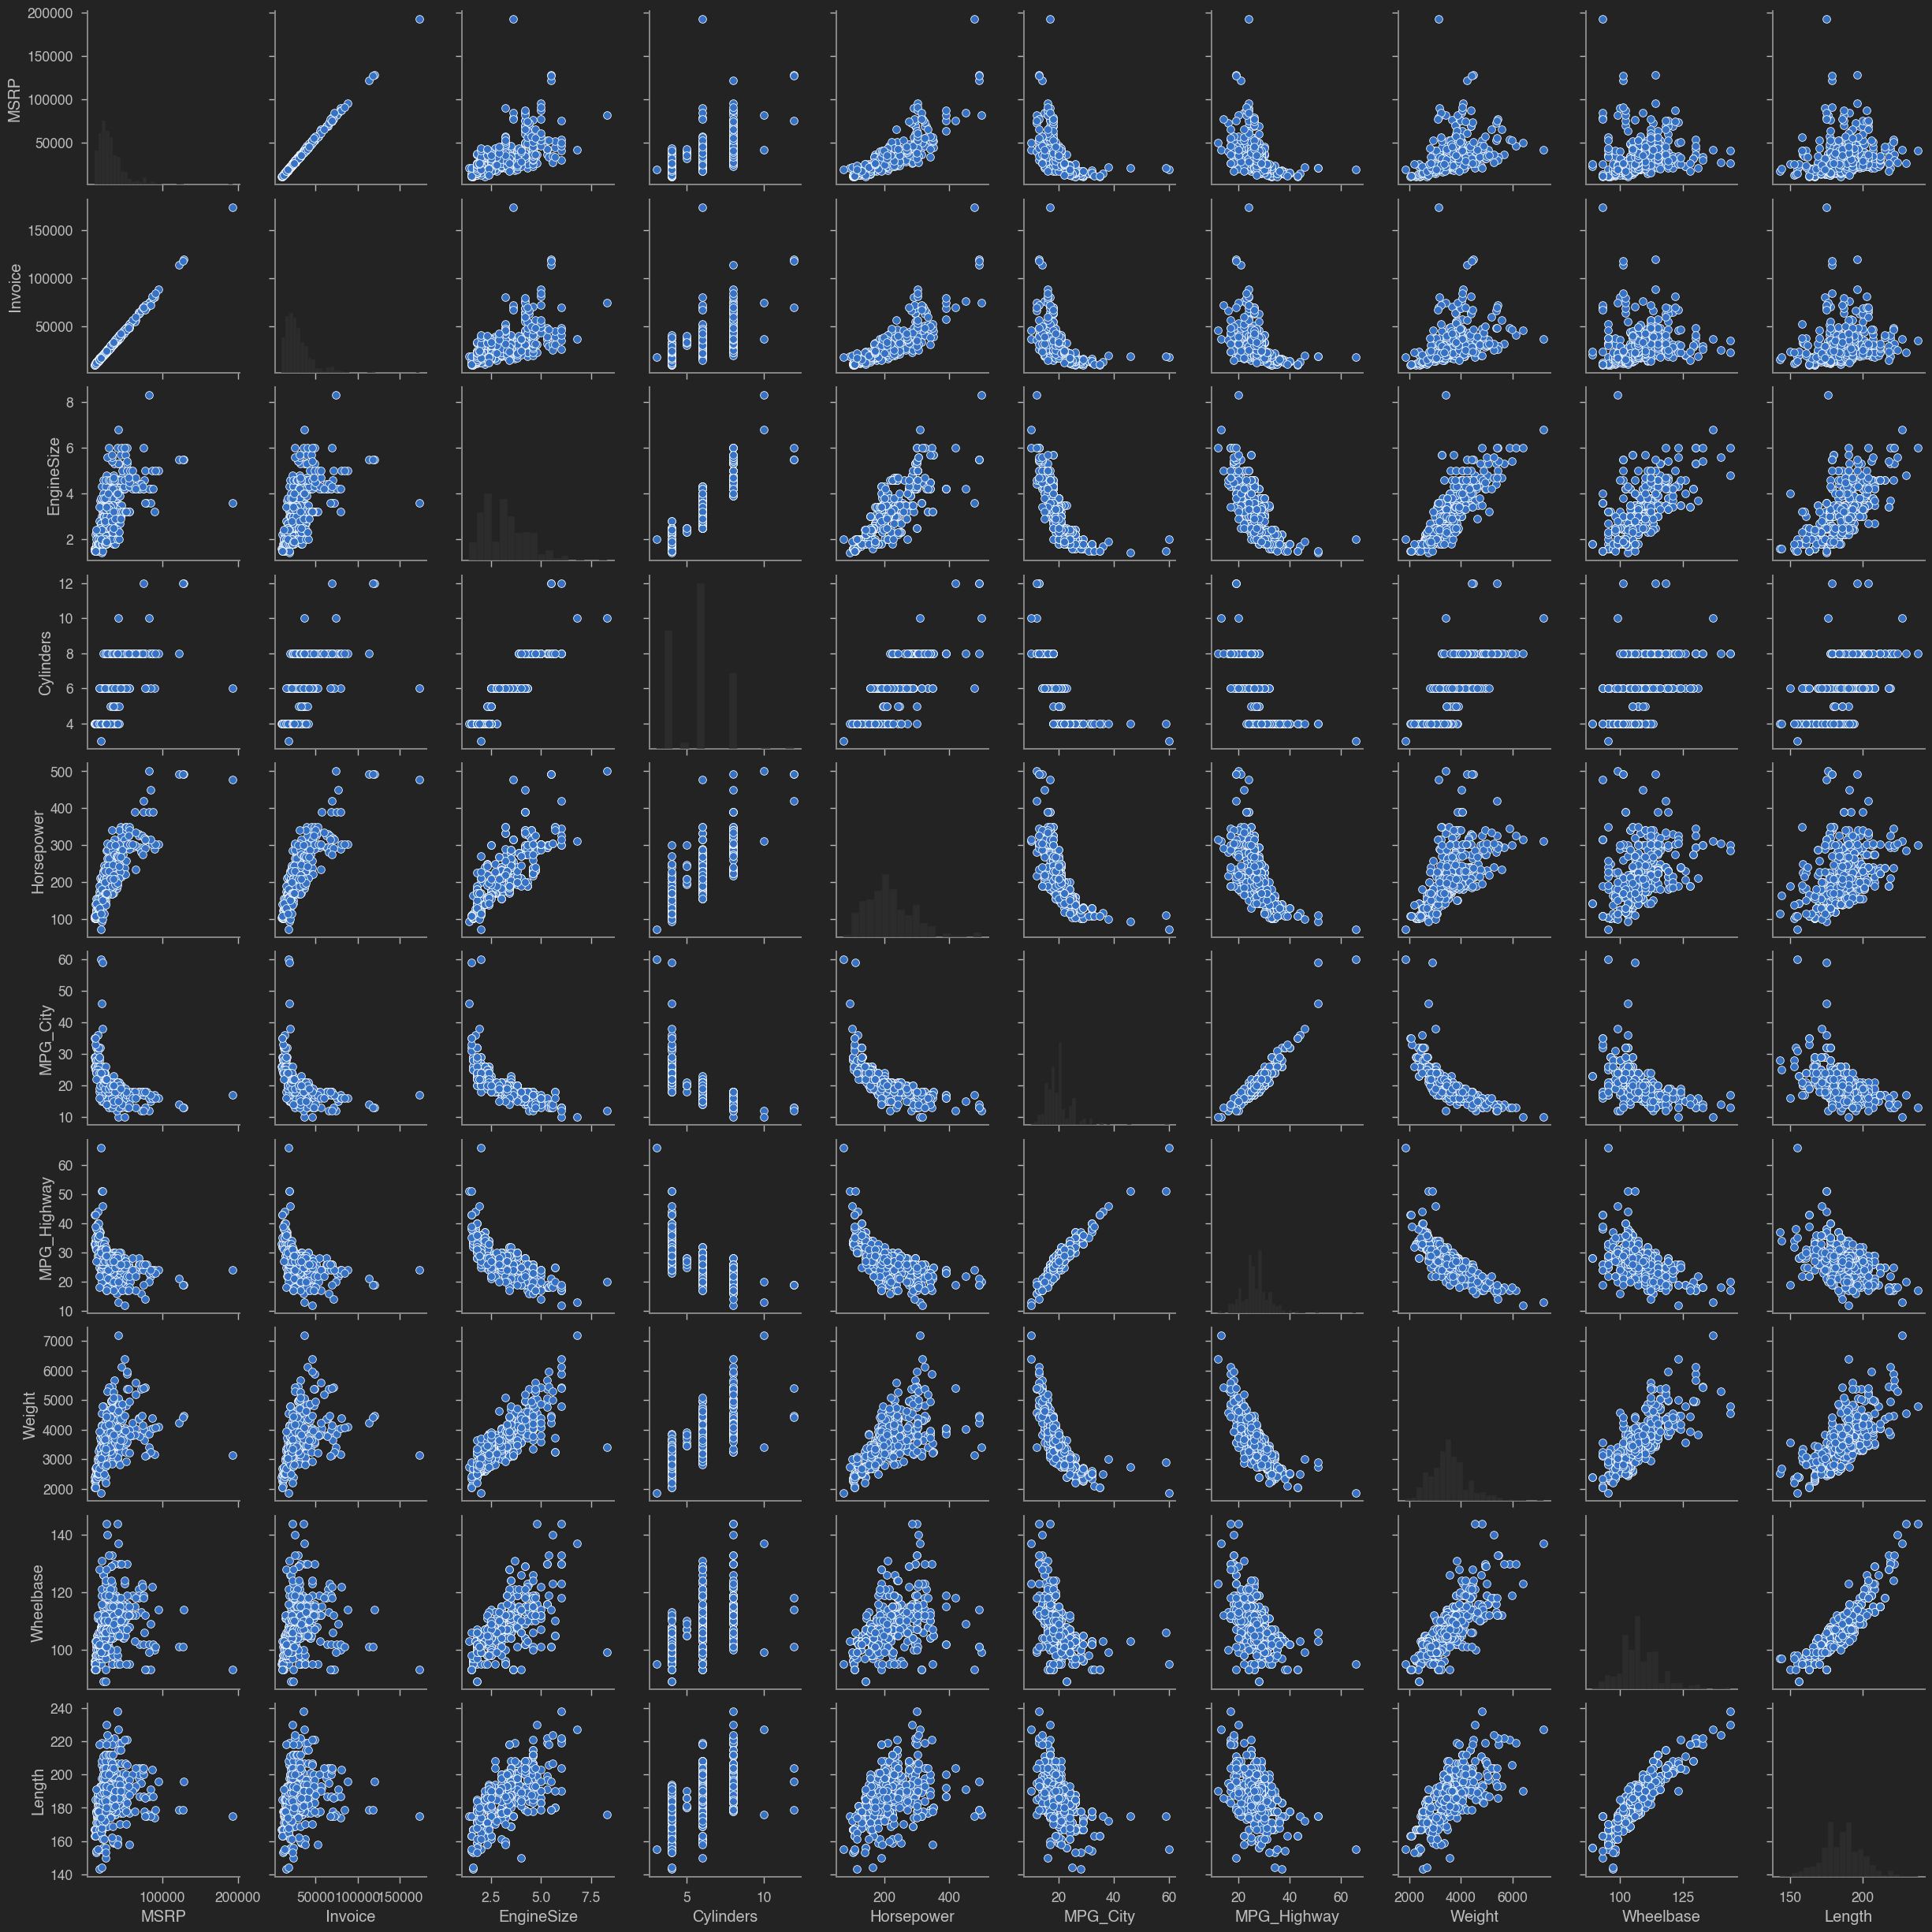

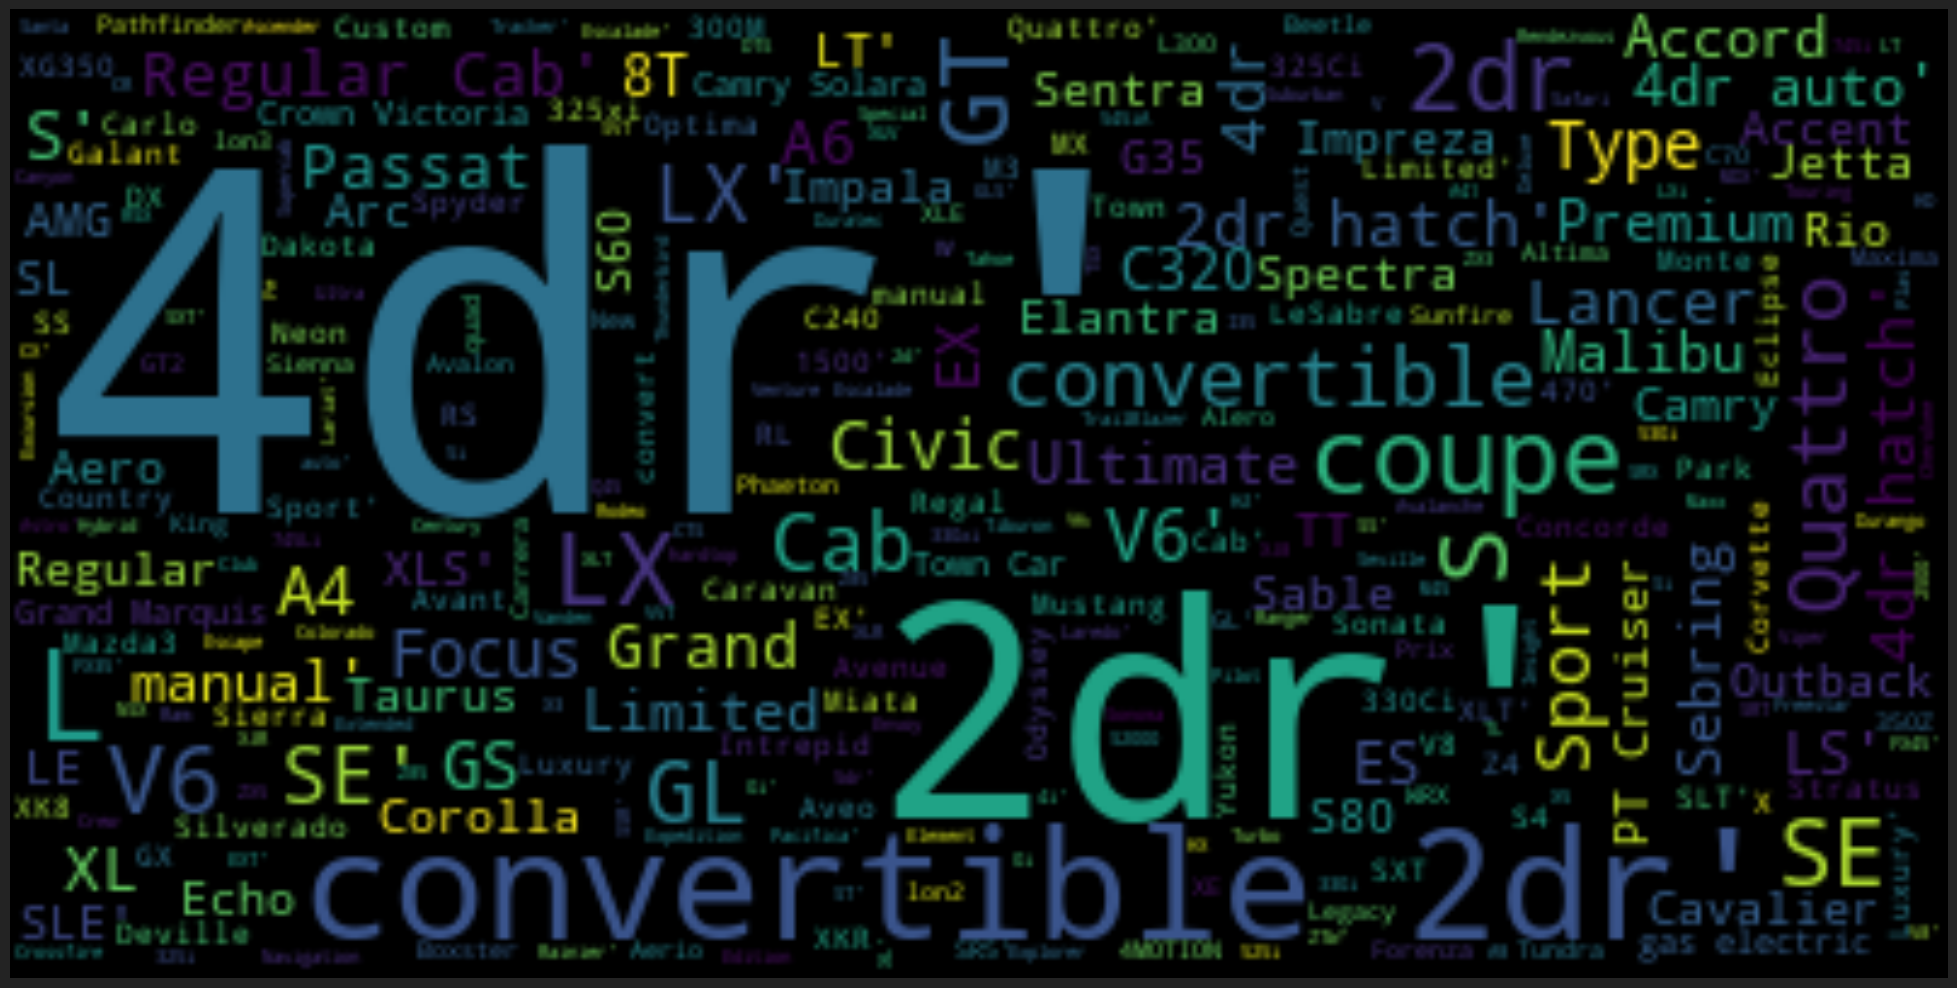

In [201]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [202]:
# Obtain the correlation matrix
car_df.corr()


,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.573238,0.649742,0.827296,-0.475916,-0.440523,0.447987,0.151665,0.171060
Invoice,0.999132,1.000000,0.566019,0.645226,0.824079,-0.471304,-0.435452,0.441916,0.148003,0.165645
EngineSize,0.573238,0.566019,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
Cylinders,0.649742,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.827296,0.824079,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
MPG_City,-0.475916,-0.471304,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
MPG_Highway,-0.440523,-0.435452,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
Weight,0.447987,0.441916,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
Wheelbase,0.151665,0.148003,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
Length,0.171060,0.165645,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


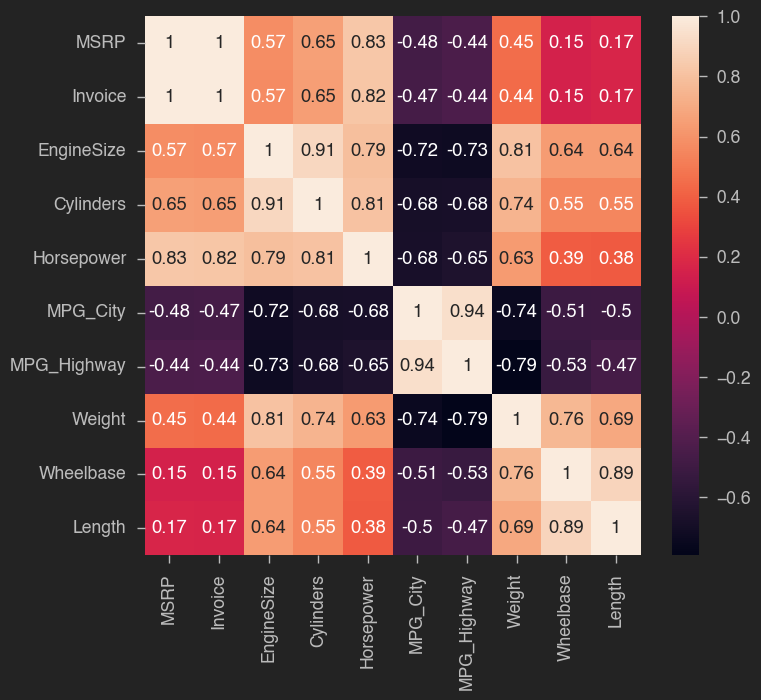

In [203]:
sns.heatmap(car_df.corr(),annot=True)
plt.show()

In [204]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [205]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
car_dum=pd.get_dummies(car_df,columns=['Make','Model','Type','Origin','DriveTrain'])

In [206]:
car_dum

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265,17,23,4451,106,189,...,0,0,0,0,1,0,0,1,0,0
1,23820,21761,2.0,4.0,200,24,31,2778,101,172,...,1,0,0,0,1,0,0,0,1,0
2,26990,24647,2.4,4.0,200,22,29,3230,105,183,...,1,0,0,0,1,0,0,0,1,0
3,33195,30299,3.2,6.0,270,20,28,3575,108,186,...,1,0,0,0,1,0,0,0,1,0
4,43755,39014,3.5,6.0,225,18,24,3880,115,197,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,38203,2.4,5.0,197,21,28,3450,105,186,...,1,0,0,0,0,1,0,0,1,0
424,42565,40083,2.3,5.0,242,20,26,3450,105,186,...,1,0,0,0,0,1,0,0,1,0
425,45210,42573,2.9,6.0,268,19,26,3653,110,190,...,1,0,0,0,0,1,0,0,1,0
426,26135,24641,1.9,4.0,170,22,29,2822,101,180,...,0,0,0,1,0,1,0,0,1,0


In [207]:
# Invoice feature does not contribute to car price prediction 

In [208]:
df_data=car_dum.drop(['Invoice'],axis=1)
df_data

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,1,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4.0,200,24,31,2778,101,172,1,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4.0,200,22,29,3230,105,183,1,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6.0,270,20,28,3575,108,186,1,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6.0,225,18,24,3880,115,197,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,2.4,5.0,197,21,28,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
424,42565,2.3,5.0,242,20,26,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
425,45210,2.9,6.0,268,19,26,3653,110,190,0,...,1,0,0,0,0,1,0,0,1,0
426,26135,1.9,4.0,170,22,29,2822,101,180,0,...,0,0,0,1,0,1,0,0,1,0


In [209]:
df_data.shape

(426, 482)

In [210]:
# Feeding input features to X and output (MSRP) to y
X = df_data.drop("MSRP", axis = 1)
y = df_data["MSRP"]

In [211]:
X = np.array(X)
X

array([[  3.5,   6. , 265. , ...,   1. ,   0. ,   0. ],
       [  2. ,   4. , 200. , ...,   0. ,   1. ,   0. ],
       [  2.4,   4. , 200. , ...,   0. ,   1. ,   0. ],
       ...,
       [  2.9,   6. , 268. , ...,   0. ,   1. ,   0. ],
       [  1.9,   4. , 170. , ...,   0. ,   1. ,   0. ],
       [  2.5,   5. , 208. , ...,   1. ,   0. ,   0. ]])

In [212]:
y = np.array(y)

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

In [215]:
X_train.shape

(340, 481)

In [216]:
X_test.shape

(86, 481)

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [219]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression()

In [220]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.827126014215616

In [222]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [223]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.8088021928845144

In [224]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
RandomForest_model =RandomForestRegressor()
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor()

In [226]:
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.8948572569977156

In [228]:
from xgboost import XGBRegressor

In [229]:
model=XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [230]:
accuracy_XGBoost = model.score(X_test, y_test)
accuracy_XGBoost

0.9485483745910788

In [231]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

In [232]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 8034.582 
MSE = 64554506.82174174 
MAE = 5942.372673370878 
R2 = 0.827126014215616


In [233]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(y_predict_RandomForest, y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

In [234]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 6265.967 
MSE = 39262344.12656627 
MAE = 4168.718953488373 
R2 = 0.8948572569977156


In [235]:
y_predict_XGBoost = model.predict(X_test)

fig = sns.regplot(y_predict_XGBoost, y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

In [236]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 4383.268 
MSE = 19213037.105493378 
MAE = 3379.1774277797963 
R2 = 0.9485483745910788


From the ablove results, it is clearly shown that XGBoost model scores 94% accuracy which outperforms Linear Regression and Random Forest Regression models